In [ ]:
# importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.transformations.compose import FitInTransform
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
# reading and defining dataframe for shapelet extraction 
df_shapelets = pd.read_csv('random_series_per_cluster_kmeans_pca.csv')


In [26]:
classes = df_shapelets['cluster']

In [31]:
classes

0      2
1      2
2      2
3      2
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Name: cluster, Length: 400, dtype: int64

In [32]:
type(classes)

pandas.core.series.Series

In [30]:
encoder = LabelEncoder()
y = encoder.fit_transform(classes)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [7]:
df_shape= df_shapelets.drop(columns = 'cluster')

In [9]:
df_shape.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
123    0
124    0
125    0
126    0
127    0
Length: 128, dtype: int64

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df_shape)

StandardScaler()

In [20]:
X_shapelets = scaler.transform(df_shape)

In [21]:
X_shapelets

array([[-0.37055537,  0.72517685,  0.9957022 , ...,  0.47283625,
         0.22501785, -1.9697883 ],
       [-0.80982429, -1.23697905, -1.79307124, ..., -0.36455702,
        -0.57130693, -0.51269619],
       [ 0.71401027,  0.66234227,  0.56611572, ..., -1.16470665,
        -1.42759165, -1.17588704],
       ...,
       [-0.47715371, -1.77587008, -0.57315115, ...,  1.27184927,
         0.47304328,  1.22539219],
       [-2.03479874, -2.72601563, -0.29859781, ...,  1.06298785,
         0.80317825,  0.23667078],
       [-0.18360745, -0.80454705, -0.12086066, ...,  0.97889564,
         0.72300352,  0.10019717]])

In [4]:
from tslearn.shapelets import LearningShapelets

In [23]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.1 MB/s eta 0:00:0000:0100:01


In [24]:
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
from pyts.transformation import ShapeletTransform

In [33]:
yc = np.array(classes)

In [34]:
yc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [35]:
st = ShapeletTransform(window_sizes=[12, 24, 36, 48],
                       random_state=42, sort=True)
st.fit(X_shapelets, yc)

ShapeletTransform(random_state=42, sort=True, window_sizes=[12, 24, 36, 48])

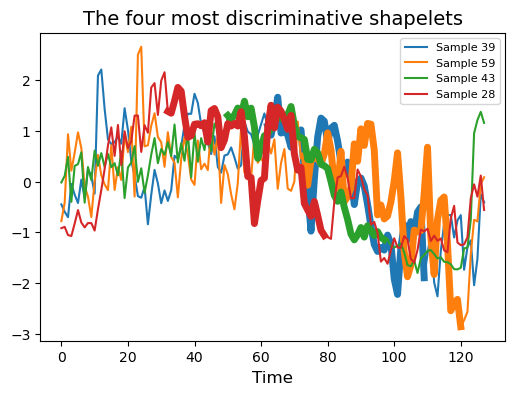

In [36]:
plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:4]):
    idx, start, end = index
    plt.plot(X_shapelets[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_shapelets[idx, start:end],
             lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The four most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()




In [38]:
st.shapelets_.shape

(64,)

In [40]:
st.shapelets_[:4]

array([array([ 1.09287863e+00,  9.12406389e-01,  1.22822799e+00,  1.65952084e+00,
               9.54837496e-01,  1.00428394e+00,  9.13999103e-01,  6.75109957e-01,
               8.81716282e-01,  9.71631809e-01,  1.01654946e+00,  2.06391130e-01,
              -1.96559891e-01, -9.75506693e-01,  5.03312916e-02,  8.73998150e-01,
               1.24820565e+00,  1.18783666e+00,  7.73444463e-01,  1.04900789e+00,
               1.10691667e+00,  7.96175772e-01,  3.77320810e-01,  1.33429308e-01,
               3.83768536e-01,  1.12775700e-01, -4.52442045e-01, -1.28152901e-03,
               6.97795168e-02, -8.67385235e-02, -4.53649140e-01, -8.69785817e-01,
              -1.23649406e+00, -1.37503539e+00, -1.29735958e+00, -1.34787436e+00,
              -1.05311444e+00, -1.22511574e+00, -1.91308662e+00, -2.22129359e+00,
              -1.30480858e+00, -8.51187249e-01, -1.14814348e+00, -7.88534246e-01,
              -1.02979070e+00, -6.00833945e-01, -4.99572504e-01, -1.89244351e+00]),
       array([

In [44]:
st.indices_[:4, 1:]

array([[ 62, 110],
       [ 73, 121],
       [ 50,  98],
       [ 32,  80]])

In [43]:
st.indices_.shape

(64, 3)

In [45]:
data_shapelets = pd.read_csv('dataframe per le shapelets.csv')
data_shapelets

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,cluster
0,-0.079298,0.111576,0.652400,0.685316,0.471629,0.600200,0.961618,0.949090,-0.097749,-0.589316,...,-0.999432,-0.041767,0.299025,1.336981,2.132749,-0.765325,-0.358852,-0.491476,-0.593407,2
1,0.269439,2.050223,1.862141,1.154981,0.979225,0.771227,0.534744,0.859890,-0.032535,0.256362,...,1.095943,2.364241,-0.111761,-0.869591,0.562131,-0.886448,-0.452199,-0.873532,0.214441,3
2,-0.029519,-0.434622,0.612819,0.533656,-0.127354,-0.322700,0.163935,0.138145,-0.259737,-0.224185,...,-0.433451,-1.472541,-1.327006,-0.092028,-1.330532,-1.321353,0.838166,-0.630707,0.843936,2
3,-0.100936,-0.909611,-1.275674,-1.684878,-1.026490,-0.643536,-0.242003,0.153117,0.579062,0.651013,...,-1.272094,-1.432865,-2.108851,-2.416117,-1.834537,-1.377654,-1.628724,-1.759445,-1.824944,2
4,0.016355,0.142617,0.127877,-0.014711,-0.035173,1.226351,-0.202813,-0.827895,-0.101269,0.142082,...,-1.535076,-1.487977,-0.023087,-1.309985,-0.503810,-0.293579,-0.832298,-0.606744,-0.683770,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.046660,0.032344,-0.091155,0.683613,2.379157,0.797152,-0.409901,-1.426084,-1.438515,0.209598,...,0.304202,-0.265509,-0.338436,1.683379,-0.276427,-0.400512,-1.422002,-0.823581,-0.598723,1
9996,0.052352,0.876478,0.842213,1.095838,1.121138,0.612869,-0.134884,-0.233503,0.016944,1.236869,...,-0.251845,-0.298384,-0.271413,-0.372495,-2.102383,-1.467263,-0.182379,-0.266126,-0.200347,3
9997,0.027657,1.121401,1.995942,1.151986,0.132280,-0.418747,-0.550023,-0.074949,0.797484,0.978308,...,0.210188,1.080010,1.177521,0.788600,-0.073743,0.588622,0.825286,0.886626,2.058149,3
9998,-0.126961,-0.741530,-0.493799,-0.722186,-0.721515,-0.527922,-0.527062,-0.784748,-0.853449,0.647229,...,0.628672,0.495019,0.549037,1.394528,1.957302,-0.099253,-0.032496,0.344308,0.041067,0


In [46]:
label_vec = data_shapelets['cluster']


In [51]:
lc = np.array(label_vec)
lc

array([2, 3, 2, ..., 3, 0, 3])

In [47]:
data_shapelets = data_shapelets.drop(columns = 'cluster')

In [48]:
data_shapelets

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.079298,0.111576,0.652400,0.685316,0.471629,0.600200,0.961618,0.949090,-0.097749,-0.589316,...,-1.775832,-0.999432,-0.041767,0.299025,1.336981,2.132749,-0.765325,-0.358852,-0.491476,-0.593407
1,0.269439,2.050223,1.862141,1.154981,0.979225,0.771227,0.534744,0.859890,-0.032535,0.256362,...,0.035027,1.095943,2.364241,-0.111761,-0.869591,0.562131,-0.886448,-0.452199,-0.873532,0.214441
2,-0.029519,-0.434622,0.612819,0.533656,-0.127354,-0.322700,0.163935,0.138145,-0.259737,-0.224185,...,-0.892827,-0.433451,-1.472541,-1.327006,-0.092028,-1.330532,-1.321353,0.838166,-0.630707,0.843936
3,-0.100936,-0.909611,-1.275674,-1.684878,-1.026490,-0.643536,-0.242003,0.153117,0.579062,0.651013,...,-1.579254,-1.272094,-1.432865,-2.108851,-2.416117,-1.834537,-1.377654,-1.628724,-1.759445,-1.824944
4,0.016355,0.142617,0.127877,-0.014711,-0.035173,1.226351,-0.202813,-0.827895,-0.101269,0.142082,...,0.152546,-1.535076,-1.487977,-0.023087,-1.309985,-0.503810,-0.293579,-0.832298,-0.606744,-0.683770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.046660,0.032344,-0.091155,0.683613,2.379157,0.797152,-0.409901,-1.426084,-1.438515,0.209598,...,-0.064872,0.304202,-0.265509,-0.338436,1.683379,-0.276427,-0.400512,-1.422002,-0.823581,-0.598723
9996,0.052352,0.876478,0.842213,1.095838,1.121138,0.612869,-0.134884,-0.233503,0.016944,1.236869,...,-0.369025,-0.251845,-0.298384,-0.271413,-0.372495,-2.102383,-1.467263,-0.182379,-0.266126,-0.200347
9997,0.027657,1.121401,1.995942,1.151986,0.132280,-0.418747,-0.550023,-0.074949,0.797484,0.978308,...,-0.424397,0.210188,1.080010,1.177521,0.788600,-0.073743,0.588622,0.825286,0.886626,2.058149
9998,-0.126961,-0.741530,-0.493799,-0.722186,-0.721515,-0.527922,-0.527062,-0.784748,-0.853449,0.647229,...,-0.310713,0.628672,0.495019,0.549037,1.394528,1.957302,-0.099253,-0.032496,0.344308,0.041067


In [52]:
scaler.fit(data_shapelets)

StandardScaler()

In [53]:
X_normalized = scaler.transform(data_shapelets)

In [ ]:
# partitioning 

X_train, X_test, y_train,y_test = train_test_split(X_normalized, lc, test_size = 0.3 , random_state = 100, stratify = lc)

In [ ]:
# trasformation of the dataset in shapelet dataset

X_train_tr = st.transform(X_train)
X_test_tr = st.transform(X_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [57]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_tr,y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
y_pred = model.predict(X_test_tr)

In [60]:
print("\nReport di classificazione:")
print(classification_report(y_test, y_pred))


Report di classificazione:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       577
           1       0.52      0.52      0.52       892
           2       0.68      0.67      0.67       545
           3       0.54      0.55      0.55       986

    accuracy                           0.57      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.57      0.57      0.57      3000



In [61]:
def find_shapelet_position(shapelet, time_series):
    min_dist = float('inf')
    best_pos = 0
    for i in range(len(time_series) - len(shapelet) + 1):
        dist = np.sum((shapelet - time_series[i:i+len(shapelet)])**2)
        if dist < min_dist:
            min_dist = dist
            best_pos = i
    return best_pos


In [62]:
top_4_shapelets = st.shapelets_[:4]


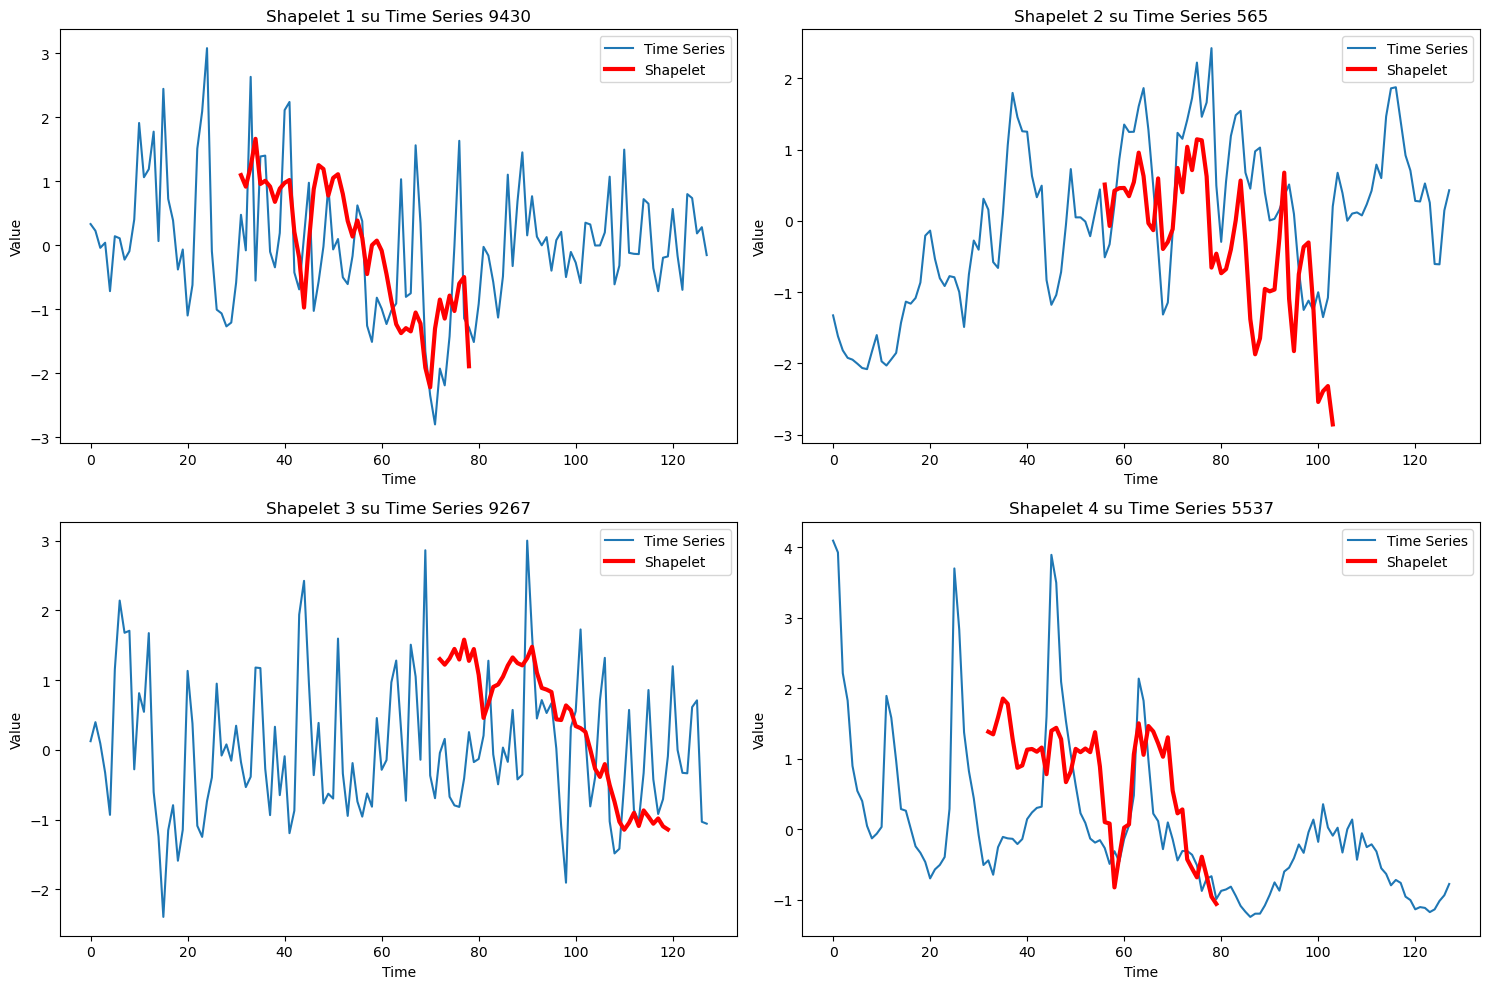

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, shapelet in enumerate(top_4_shapelets):
    random_index = np.random.randint(0, len(X_normalized))
    time_series = X_normalized[random_index]
    pos = find_shapelet_position(shapelet, time_series)
    axs[i].plot(time_series, label='Time Series')
    axs[i].plot(range(pos, pos + len(shapelet)), shapelet, 'r', linewidth=3, label='Shapelet')
    axs[i].set_title(f'Shapelet {i+1} su Time Series {random_index}')
    axs[i].legend()
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
plt.tight_layout()
plt.show()